#Decision Tree
A tree shaped algorithm to find the coarse of action. Each node in the tree represnt a action.



##Problem Statement

Use Machine Learning to Predict the selling price of houses baesd on some economic factors by using Decision Tree Model

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read dataset and view dataset
boston = pd.read_csv('datasets/Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


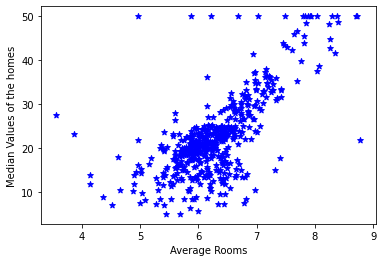

In [3]:
#visualization of dataset
x = boston['rm']
y = boston['medv']

#plot
plt.scatter(x,y,color='blue',marker='*')

#labelling x and y axis
plt.xlabel('Average Rooms')
plt.ylabel('Median Values of the homes')
plt.show()

In [4]:
X = pd.DataFrame(x)  #feature variable
Y = pd.DataFrame(y)  #target variable

In [5]:
#Dividing the data in two sets.
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [6]:
#Building the model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='mse', random_state=100,max_depth=4,min_samples_leaf=1)

In [7]:
#Model training
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [8]:
#Visualizing the tree
from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file = 'regression_tree.dot')

In [9]:
#Predicting the value
y_pred = regressor.predict(X_test)
y_pred


array([19.64660633, 19.64660633, 33.93913043, 19.64660633, 19.64660633,
       15.7453125 , 35.16666667, 15.7453125 , 15.7453125 , 25.93214286,
       25.93214286, 19.64660633, 15.7453125 , 33.93913043, 19.64660633,
       19.64660633, 19.64660633, 19.64660633, 19.64660633, 25.93214286,
       19.64660633, 19.64660633, 19.64660633, 25.93214286, 19.64660633,
       19.64660633, 19.64660633, 25.93214286, 19.64660633, 15.7453125 ,
       25.93214286, 19.64660633, 19.64660633, 19.64660633, 19.64660633,
       19.64660633, 33.93913043, 19.64660633, 15.7453125 , 15.7453125 ,
       19.64660633, 19.64660633, 35.16666667, 35.16666667, 19.64660633,
       15.7453125 , 19.64660633, 15.7453125 , 19.64660633, 19.64660633,
       25.93214286, 25.93214286, 19.64660633, 19.64660633, 19.64660633,
       19.64660633, 15.7453125 , 39.15      , 19.64660633, 19.64660633,
       19.64660633, 15.7453125 , 19.64660633, 19.64660633, 25.93214286,
       50.        , 10.4       , 19.64660633, 19.64660633, 15.74

In [10]:
#print values
print(y_pred[4:9])
print(Y_test[4:9])

[19.64660633 15.7453125  35.16666667 15.7453125  15.7453125 ]
     medv
114  18.5
424  11.7
303  33.1
477  12.0
184  26.4


In [11]:
#rsme value
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, Y_test)
rmse = np.sqrt(mse)
print(rmse)

7.256298644582581
